In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math


#### 1

In [7]:
def inter(x,a,b):
    """Test si x est dans l'intervalle (a,b)"""
    if a<=x<=b:
        return True
def Y(X):
    """fonction qui retourne les classes de x """
    y = []
    for i in range(X.shape[0]):
        if (inter(X[i][0],-1,-.5) or inter(X[i][0],0,.5)) and (inter(X[i][1],-1,-.5) or inter(X[i][1],0,.5)):
            y.append(1)
        elif  (inter(X[i][0],-.5,0) or inter(X[i][0],.5,1)) and (inter(X[i][1],-.5,0) or inter(X[i][1],.5,1)):
            y.append(1)
        else:
            y.append(-1)
    return np.array(y)    

In [8]:
def echan(N:int):
    """Generer les echantions X,y"""
    X = np.random.uniform(-1,1, (N,2))
    y = Y(X)
    return X,y

In [9]:
N = 5
echan(N)

(array([[ 0.21469406, -0.21562482],
        [ 0.61513975, -0.55195488],
        [-0.16140027,  0.70736147],
        [-0.48761065,  0.9197065 ],
        [ 0.92130069,  0.47531917]]),
 array([-1, -1,  1,  1, -1]))

In [10]:
X_train,y_train = echan(N = 300)
X_test,y_test = echan(N = 1000)

#### 2

In [13]:
def phi_2(x, d):
    """ fonction permettant d'appliquer la transformation phi"""
    phi_x = np.array([1])
    
    
    for i in range(d+1):
        for j in range(d+1):
            
            if i + j > d:
                continue
            
            phi_x = np.append(phi_x, x[0]**i * x[1]**j)
            
    return phi_x


In [14]:
def fit_transform(X,y,deg:int):
    """retourne le X transformé et le y"""
    X_transform  = np.array([phi_2(_,deg) for _ in X])
    return X_transform, y

#### 3

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import hinge_loss
deg = 3
#creation de classifieur svc avec un kernel lineaire.
model = SVC(C= 10, kernel = "linear")
X,y = fit_transform(X_train,y_train,deg)
model.fit(X,y)
y_pred = model.predict(X)
# erreur emplirique
hinge_loss(y,y_pred)

0.8066666666666666

#### 4

In [22]:
def plot_data(X_train,y_train, X_test,y_test):
    """
    Plot des echatillions d'apprentissage et de test. 
    En rouge les donnes de test et en bleu les donnees d'entrainement.
    En point : les donnees de label y = 1
    En croix : les donnes de label y = -1
    
    """
    fig, ax = plt.subplots(figsize = (8,8))
    for i, label in enumerate(y_train):
        if label == 1:
            ax.scatter(X_train[i][0],X_train[i][1], c = 'b', marker = 'o', label = "X_train pour y = 1")
        else :
            ax.scatter(X_train[i][0],X_train[i][1], c= 'b', marker = 'x',label = "X_train pour y = -1")
    
    for i,label in enumerate(y_test):
        if label == 1:
            ax.scatter(X_test[i][0],X_test[i][1], c = 'r', marker = 'o')
        else :
            ax.scatter(X_test[i][0],X_test[i][1], c= 'b', marker = 'x')
    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    
    plt.show()   

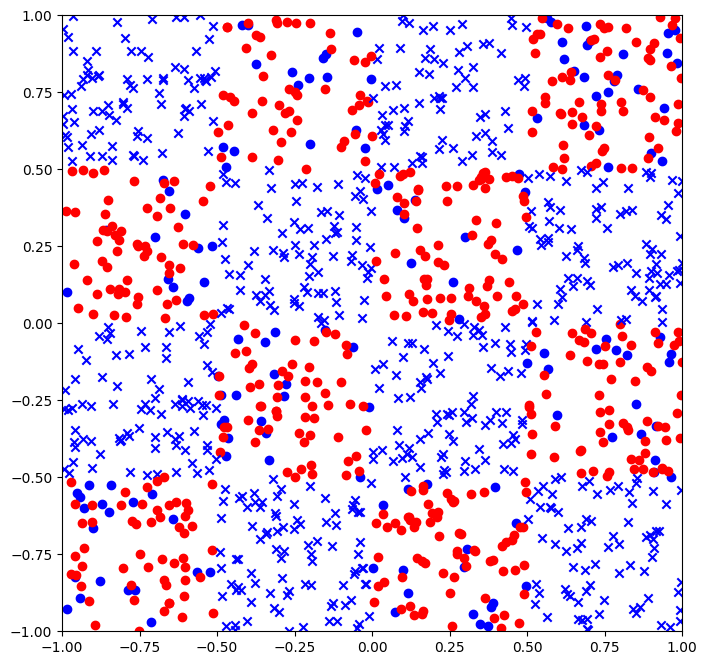

In [24]:
plot_data(X_train,y_train,X_test,y_test)

#### 5

In [32]:
def loss(X,y,model):
    """ Calcul le loss pour un model donné"""
    loss = []
    for x,label in zip(X,y):
        
        prediction = model.predict([x])[0]
        loss.append(max(0,1-label*prediction))
    return np.array(loss)
    
def plot_loss(deg,c,kernel):
    """deg = dPoly
    c esl le coeff du classifieur
    kernel : le noyau de notre model
    """
    clf = SVC(C=c, kernel = kernel) #creation du classifieur
    X,y = fit_transform(X_train,y_train,deg) #application de la transformation phi
    clf.fit(X,y)
    loss_train = loss(X,y,clf)
    # print(loss_train)
    print(f"Erreur empirique  en apprentissage pour c = {c} et deg = {deg}: ",loss_train.sum()/loss_train.shape[0])
    X2,y2 = fit_transform(X_test,y_test,deg)
    loss_test = loss(X2,y2,clf)
    print(f"Erreur empirique en test pour c = {c} et deg = {deg}: ", loss_test.sum()/loss_test.shape[0])
    fig,ax = plt.subplots(figsize = (4,4))
    ax.plot(loss_train, label = "erreur apprentissage pout C = "+str(c), c = 'b')
    ax.plot(loss_test, label = "erreur en test pour C = "+str(c), c = 'r')
    ax.set_xlim([0,20])
    ax.set_ylim([0,5])
    plt.legend(loc = 'best')
    plt.show()
    


Erreur empirique  en apprentissage pour c = 0.1 et deg = 3:  0.7666666666666667
Erreur empirique en test pour c = 0.1 et deg = 3:  0.864


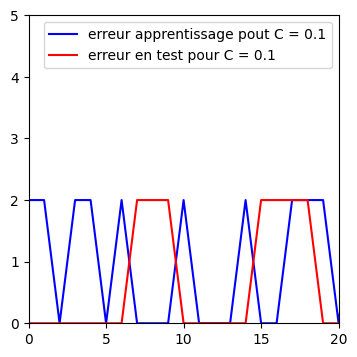

Erreur empirique  en apprentissage pour c = 1 et deg = 3:  0.7933333333333333
Erreur empirique en test pour c = 1 et deg = 3:  0.906


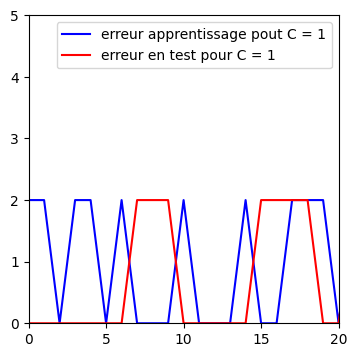

Erreur empirique  en apprentissage pour c = 5 et deg = 3:  0.82
Erreur empirique en test pour c = 5 et deg = 3:  0.926


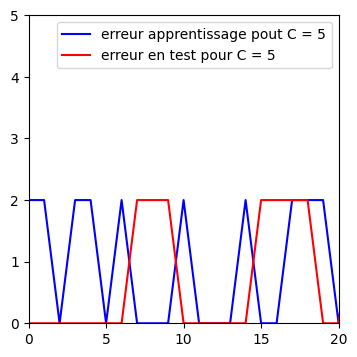

Erreur empirique  en apprentissage pour c = 10 et deg = 3:  0.8066666666666666
Erreur empirique en test pour c = 10 et deg = 3:  0.922


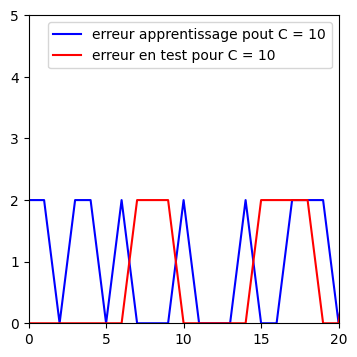

Erreur empirique  en apprentissage pour c = 30 et deg = 3:  0.8066666666666666
Erreur empirique en test pour c = 30 et deg = 3:  0.92


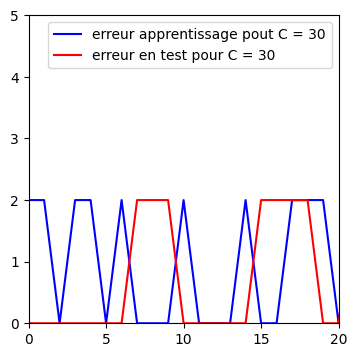

Erreur empirique  en apprentissage pour c = 100 et deg = 3:  0.8066666666666666
Erreur empirique en test pour c = 100 et deg = 3:  0.92


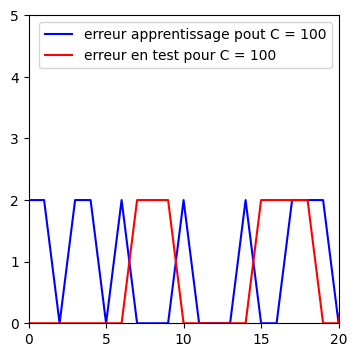

In [33]:
C = [.1,1,5,10,30,100]
deg = 3 #on fixe dpoly a 3.
for c in C:
    plot_loss(deg,c, "linear")


#### 6

In [34]:
#6
dpoly = range(1,9) #dpoly = 1,2,...,8
C = 10
model = SVC(C= 10, kernel = "linear")
for deg in dpoly:
    X,y = fit_transform(X_train,y_train,deg)
    X2,y2 = fit_transform(X_test,y_test,deg)
    model.fit(X,y)
    y_pred_test = model.predict(X2)
    print(f"erreur empirique en test pour deg = {deg} : {hinge_loss(y2,y_pred_test)}")
    print("\n===================================================================")
# hinge_loss(y,y_pred)

erreur empirique en test pour deg = 1 : 1.0

erreur empirique en test pour deg = 2 : 0.874

erreur empirique en test pour deg = 3 : 0.922

erreur empirique en test pour deg = 4 : 0.902

erreur empirique en test pour deg = 5 : 0.906

erreur empirique en test pour deg = 6 : 0.732

erreur empirique en test pour deg = 7 : 0.718

erreur empirique en test pour deg = 8 : 0.69



Le valeur de dpoly optimal pour C fixé a 10 est : dpoly = $8$ 

#### 7

In [35]:
#Avec le kernel gaussien
deg = 8
model = SVC(C = 10, kernel ="rbf")
X,y = fit_transform(X_train,y_train,deg)
X2,y2 = fit_transform(X_test,y_test,deg)
model.fit(X,y)
y_pred_train = model.predict(X)
y_pred_test = model.predict(X2)
print(f"erreur empirique  en entrainement pour deg = {deg} et C = {10} :  {hinge_loss(y,y_pred_train)}")
print(f"score en prediction pour deg = {deg} et C = {10}: {hinge_loss(y2,y_pred_test)}")


erreur empirique  en entrainement pour deg = 8 et C = 10 :  0.44
score en prediction pour deg = 8 et C = 10: 0.676


Erreur empirique  en apprentissage pour c = 10 et deg = 8:  0.44
Erreur empirique en test pour c = 10 et deg = 8:  0.676


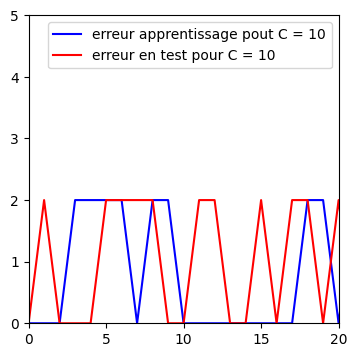

In [36]:
plot_loss(deg = 8,c= 10, kernel="rbf")
    


Comparaison entre le noyau gaussien et le noyau polynomiale

In [38]:
#noyau gaussien
C = [.1,1,5.10,30,100]
gamma = [.1,.5,1,2,10]
X_train,y_train = echan(N = 300)
X_test,y_test = echan(N = 1000)

Mat_Err_emp_test = np.zeros((len(C),len(gamma)))
for i in range(len(C)):
    for j in range(len(gamma)):
        model = SVC(C=C[i],kernel = "rbf", gamma=gamma[j])
        # X,y = fit_transform(X_train,y_train,deg)
        # X2,y2 = fit_transform(X_test,y_test,deg)
        model.fit(X_train,y_train)
        y_pred_test = model.predict(X_test)
        Mat_Err_emp_test[i,j] = hinge_loss(y_test,y_pred_test)


Min_loss_test = np.min(Mat_Err_emp_test)

row_indice_2, col_indice_2 = np.where(Mat_Err_emp_test == Min_loss_test)

indice_2 = (row_indice_2[0], col_indice_2[0]) 

print(f"\nles valeurs de C et gamma pour une erreur en test minimale  avec le noyau gaussien sont C = {C[indice_2[0]]} et gamma ={gamma[indice_2[1]]}") 
print(f"Erreur correspondant : {Mat_Err_emp_test[indice_2[0],indice_2[1]]}") 


les valeurs de C et gamma pour une erreur en test minimale  avec le noyau gaussien sont C = 100 et gamma =10
Erreur correspondant : 0.146


In [39]:
#noyau polynomiale
C = [.1,1,5.10,30,100]
gamma = [.1,.5,1,2,10]
X_train,y_train = echan(N = 300)
X_test,y_test = echan(N = 1000)

Mat_Err_emp_test = np.zeros((len(C),len(gamma)))
for i in range(len(C)):
    for j in range(len(gamma)):
        model = SVC(C=C[i],kernel = "poly", gamma=gamma[j])
        # X,y = fit_transform(X_train,y_train,deg)
        # X2,y2 = fit_transform(X_test,y_test,deg)
        model.fit(X_train,y_train)
        y_pred_test = model.predict(X_test)
        Mat_Err_emp_test[i,j] = hinge_loss(y_test,y_pred_test)


Min_loss_test = np.min(Mat_Err_emp_test)

row_indice_2, col_indice_2 = np.where(Mat_Err_emp_test == Min_loss_test)

indice_2 = (row_indice_2[0], col_indice_2[0]) 

print(f"\nles valeurs de C et gamma pour une erreur en test minimale avec le noyau polynomiale  sont C = {C[indice_2[0]]} et gamma ={gamma[indice_2[1]]}")
print(f"Erreur correspondant : {Mat_Err_emp_test[indice_2[0],indice_2[1]]}") 


les valeurs de C et gamma pour une erreur en test minimale avec le noyau polynomiale  sont C = 0.1 et gamma =2
Erreur correspondant : 0.952


Avec le noyau polynomiale on obtient le couple optimal ($C$,$\gamma$) = ($0.1$,$10$) avec une erreur empire de $R_{emp}$ = $0.952$.
Pour le noyau gaussien le couple ($C$,$\gamma$) optimal est $(100,10)$ avec $R_{emp}$ = $0.146$. Le noyau gaussien permet une meilleure prediction de la classe de $x$

Exercice 2

#### 1

In [40]:
def sign(x1,x2):
    """calcul la classe de x = [x1,x2]"""
    return np.sign(50*x1**2+.5*x2**2-1)
def echan2(n):
    """Generer les echantillions X,y"""
    y = np.zeros(n)
    X = np.random.uniform(-1,1, (n,2))
    for i in range(n):
        y[i] = sign(X[i,0],X[i,1])
    return X,y

In [41]:
nbApp = 150
nbTest = 500
X_train,y_train = echan2(nbApp)
X_test, y_test = echan2(nbTest)

#### 2

In [59]:
from sklearn.svm import SVC
from sklearn.metrics import hinge_loss

nbApp = 150
nbTest = 500
X_train,y_train = echan2(nbApp)
X_test, y_test = echan2(nbTest)

#noyau polynomial
C = [.1,1,5.10,30,100]
dpoly = range(1,8)
Mat_error = np.zeros((len(C),len(dpoly)))
for i in range(len(C)):
    for j in range(len(dpoly)):
        model2 = SVC(C=C[i], kernel="poly")
        X,y = fit_transform(X_train,y_train,dpoly[j])
        X2,y2 = fit_transform(X_test,y_test,dpoly[j])
        model2.fit(X,y)
        y_pred = model2.predict(X2)
        err_emp = hinge_loss(y_pred,y2)
        Mat_error[i,j] = err_emp

min_mat_error = np.min(Mat_error) # matrice M pour stocker les erreurs empiriques
row,col = np.where(Mat_error == min_mat_error)
indices = (row[0],col[0]) #indice de la valeur minimale de la matrice contenant les erreurs empiriques

print(f"\nles valeurs de C et dpoly affichant les meilleurs performances sont C = {C[indices[0]]} et dpoly = {dpoly[indices[1]]}")
print(f"Erreur empirique correspondant: {Mat_error[indices[0],indices[1]]}")


les valeurs de C et dpoly affichant les meilleurs performances sont C = 100 et dpoly = 1
Erreur empirique correspondant: 0.12


#### 3

In [60]:
#noyau gaussien
nbApp = 150
nbTest = 500
X_train,y_train = echan2(nbApp)
X_test, y_test = echan2(nbTest)

C = [.1,1,5.10,30,100]
gamma = [.1,.5,1,2,10]

Mat_error = np.zeros((len(C),len(gamma)))
for i in range(len(C)):
    for j in range(len(gamma)):
        model2 = SVC(C=C[i], kernel="rbf", gamma = gamma[j])
        # X,y = fit_transform(X_train,y_train,dpoly[j])
        # X2,y2 = fit_transform(X_test,y_test,dpoly[j])
        model2.fit(X_train,y_train)
        y_pred = model2.predict(X_test)
        err_emp = hinge_loss(y_pred,y_test)
        Mat_error[i,j] = err_emp

min_mat_error = np.min(Mat_error)
row,col = np.where(Mat_error == min_mat_error)
indices = (row[0],col[0]) #indice de la valeur minimale de la matrice contenant les erreurs empiriques

print(f"\nles valeurs de C et gamma affichant les meilleurs performances sont C = {C[indices[0]]} et gamma = {gamma[indices[1]]}")
print(f"Erreur empirique correspondant: {Mat_error[indices[0],indices[1]]}")


les valeurs de C et gamma affichant les meilleurs performances sont C = 100 et gamma = 10
Erreur empirique correspondant: 0.044


Le noyau gaussien reste le meilleur model pour la prediction de la classe de $x$ : ($C$,$\gamma$) = $(100,10)$ pour $R_{emp}$ = $0.044$. $(C = 100,dpoly = 1)$ pour le model polynomial avec $R_{emp} = 0.12$.
Le noyau Polynomial avec la transformation non lineaire $\phi$ pour $y = sgn(50x_1^2+0.5x_2^2 - 1)$ donne une meilleur prediction que le models testés dans l'exercice 1 mais reste moin permet que le precedent model gaussien .
De maniere avec la classe  $y = sgn(50x_1^2+0.5x_2^2 - 1)$ ameliore les predictions.